In [1]:
!pip install torch
!pip install nilearn
!pip install nibabel
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install numpy
!pip install torch torchvision

!git clone https://gitlab.inria.fr/epione_ML/mcvae.git


fatal: destination path 'mcvae' already exists and is not an empty directory.


In [2]:
%cd mcvae 
!python ./setup.py install


/content/mcvae
running install
running bdist_egg
running egg_info
writing src/mcvae.egg-info/PKG-INFO
writing dependency_links to src/mcvae.egg-info/dependency_links.txt
writing top-level names to src/mcvae.egg-info/top_level.txt
writing manifest file 'src/mcvae.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
copying build/lib/__init__.py -> build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/plot.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/utilities.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/preprocessing.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/__init__.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/pytorch_modules.py -> build/bdist.linux-x86_64/egg/mcvae
copying build/lib/mcvae/diagnostics.py -> build/bdist.linux-x86_64/egg/mcvae
byte-compiling build/b

In [0]:
import mcvae

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_decomposition import PLSCanonical, CCA

# Random data generation

In [5]:
# #############################################################################
# Dataset based latent variables model

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l2]).T

transform_x = np.random.randint(-8,8, size = 10).reshape([2,5])
transform_y = np.random.randint(-8,8, size = 10).reshape([2,5])

X = latents.dot(transform_x) + 2*np.random.normal(size = n*5).reshape((n, 5))
Y = latents.dot(transform_y) + 2*np.random.normal(size = n*5 ).reshape((n, 5))

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[ 1.    0.39 -0.81 -0.08 -0.36]
 [ 0.39  1.    0.03 -0.85  0.51]
 [-0.81  0.03  1.   -0.35  0.67]
 [-0.08 -0.85 -0.35  1.   -0.73]
 [-0.36  0.51  0.67 -0.73  1.  ]]
Corr(Y)
[[ 1.    0.07 -0.89  0.44 -0.2 ]
 [ 0.07  1.   -0.02 -0.64  0.86]
 [-0.89 -0.02  1.   -0.49  0.27]
 [ 0.44 -0.64 -0.49  1.   -0.72]
 [-0.2   0.86  0.27 -0.72  1.  ]]


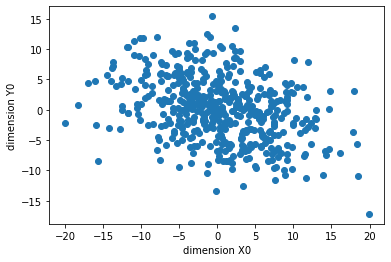

In [6]:

plt.scatter(X[:,0], Y[:,0])
plt.xlabel('dimension X0')
plt.ylabel('dimension Y0')
plt.plot();

## PLS and scikit-learn: basic use

In [0]:
train_idx = np.random.choice(range(X.shape[0]), size = int(X.shape[0]/2), replace = False)
test_idx = np.where(np.in1d(range(X.shape[0]), train_idx, assume_unique=True, invert = True))[0]

X_train = X[train_idx, :]
X_test = X[test_idx, :]

Y_train = Y[train_idx, :]
Y_test = Y[test_idx, :]


In [0]:
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

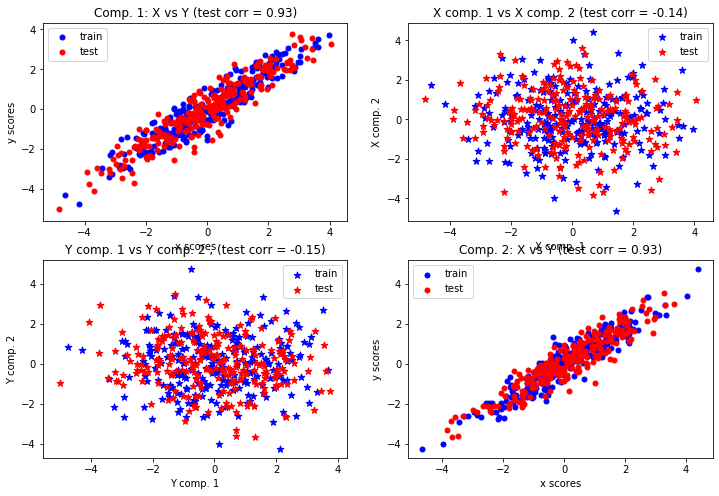

In [9]:
# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])

plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])

plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")



plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")

plt.show()


# Into the guts of latent variable models

## NIPALS for PLS

In [0]:
# Nipals method for PLS

n_components = 3

loading_x = np.ndarray([X.shape[1],n_components])
loading_y = np.ndarray([Y.shape[1],n_components])

scores_x = np.ndarray([X.shape[0],n_components])
scores_y = np.ndarray([Y.shape[0],n_components])

weight_x = np.ndarray([X.shape[1],n_components])
weight_y = np.ndarray([Y.shape[1],n_components])

current_X = X
current_Y = Y

for i in range(n_components):
    t_x = current_X[:,0]
    for _ in range(100):
        w_y = current_Y.transpose().dot(t_x)/(t_x.transpose().dot(t_x))
        w_y = w_y/np.sqrt(np.sum(w_y**2))
        t_y = current_Y.dot(w_y)
        w_x = current_X.transpose().dot(t_y)/(t_y.transpose().dot(t_y))
        w_x = w_x/np.sqrt(np.sum(w_x**2))
        t_x = current_X.dot(w_x)

    # Weights are such that X * weights = t
    weight_x[:,i] = w_x
    weight_y[:,i] = w_y
    
    # Latent dimensions
    scores_x[:,i] = t_x
    scores_x[:,i] = t_y
    
    # Loadings obtained by regressing X on t (X = t * loadings)
    
    loading_x[:,i] = np.dot(current_X.T, t_x)/t_x.transpose().dot(t_x) 
    loading_y[:,i] = np.dot(current_Y.T, t_y)/t_y.transpose().dot(t_y)
    
    # Deflation
    
    current_X = current_X - t_x.reshape(len(t_x),1).dot(w_x.reshape(1,len(w_x)))
    current_Y = current_Y - t_y.reshape(len(t_y),1).dot(w_y.reshape(1,len(w_y)))
    

In [11]:
weight_x

array([[ 0.68437956,  0.05629853,  0.4234326 ],
       [ 0.25809992,  0.54652915,  0.35516935],
       [-0.6567837 ,  0.24211209,  0.65604151],
       [-0.04294846, -0.74351958,  0.36244143],
       [-0.17832458,  0.29444309, -0.36442464]])

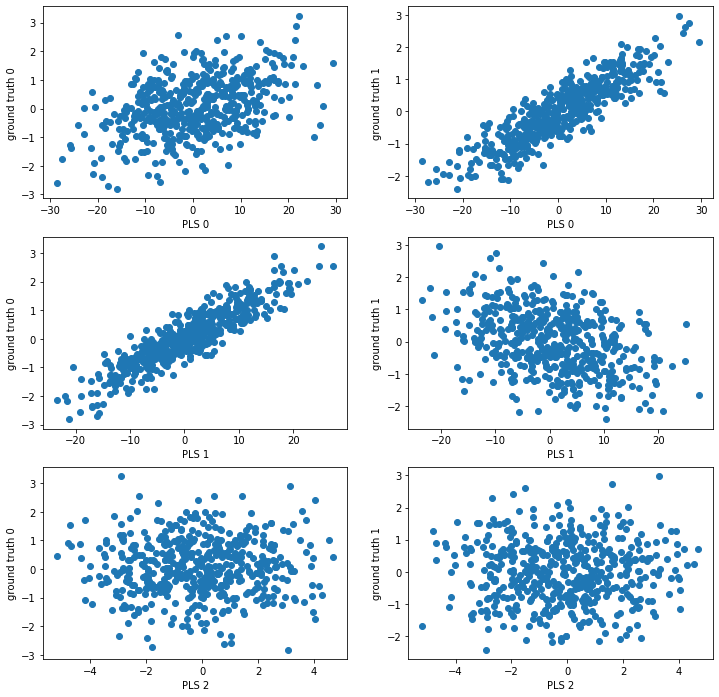

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(3,2,1)
plt.scatter(scores_x[:,0], latents[:,0])
plt.xlabel('PLS 0')
plt.ylabel('ground truth 0')
plt.subplot(3,2,2)
plt.scatter(scores_x[:,0], latents[:,1])
plt.xlabel('PLS 0')
plt.ylabel('ground truth 1')
plt.subplot(3,2,3)
plt.scatter(scores_x[:,1], latents[:,0])
plt.xlabel('PLS 1')
plt.ylabel('ground truth 0')
plt.subplot(3,2,4)
plt.scatter(scores_x[:,1], latents[:,1])
plt.xlabel('PLS 1')
plt.ylabel('ground truth 1')
plt.subplot(3,2,5)
plt.scatter(scores_x[:,2], latents[:,0])
plt.xlabel('PLS 2')
plt.ylabel('ground truth 0')
plt.subplot(3,2,6)
plt.scatter(scores_x[:,2], latents[:,1])
plt.xlabel('PLS 2')
plt.ylabel('ground truth 1')
plt.show()

In [0]:
# Identifying rotation from X to t
# t * loadings_x.T * weight = X * weight 
# T =  X * weight * (loadings_x.T * weight)^-1 = X * rotations_x

rotations_x = weight_x.dot(np.linalg.pinv(loading_x.T.dot(weight_x)))

# Solving the regression from X to Y
# Y = X * rotations_x * loadings_y.T

regression_coef = np.dot(rotations_x, loading_y.T)

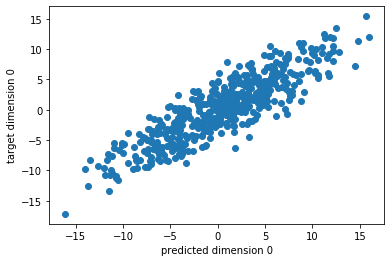

In [14]:
plt.scatter(X.dot(regression_coef)[:,0], Y[:,0])
plt.xlabel('predicted dimension 0')
plt.ylabel('target dimension 0')
plt.show()

In [0]:
# Comparing with SVD of covariance matrix

eig_val_x, eig_vect, eig_val_y = np.linalg.svd(X.transpose().dot(Y))

In [16]:
print(np.real(eig_val_x[:,:3]))
print(np.real(weight_x[:,:3]))

[[-0.6843782  -0.05631501 -0.4234326 ]
 [-0.25808676 -0.54653536 -0.35516935]
 [ 0.65678953 -0.24209627 -0.65604151]
 [ 0.04293056  0.74352062 -0.36244143]
 [ 0.17833167 -0.2944388   0.36442464]]
[[ 0.68437956  0.05629853  0.4234326 ]
 [ 0.25809992  0.54652915  0.35516935]
 [-0.6567837   0.24211209  0.65604151]
 [-0.04294846 -0.74351958  0.36244143]
 [-0.17832458  0.29444309 -0.36442464]]


In [17]:
print(np.real(eig_val_y.T[:,:3]))
print(np.real(weight_y[:,:3]))

[[ 0.23808928 -0.50235682  0.72126932]
 [-0.70488203 -0.48996922 -0.21300797]
 [-0.37756261  0.70095752  0.33655207]
 [ 0.30089969 -0.05036387 -0.56407872]
 [-0.46190981 -0.11700356  0.05427769]]
[[-0.23807668  0.50236279 -0.72126932]
 [ 0.70489432  0.48995154  0.21300797]
 [ 0.37754503 -0.70096698 -0.33655207]
 [-0.30089842  0.05037142  0.56407872]
 [ 0.46191274  0.11699198 -0.05427769]]


In [18]:
# PLS in scikit-learn 

plsca = PLSCanonical(n_components=3, scale = False)
plsca.fit(X, Y)

PLSCanonical(algorithm='nipals', copy=True, max_iter=500, n_components=3,
             scale=False, tol=1e-06)

In [19]:
print(plsca.x_weights_)
print(plsca.y_weights_)

[[ 0.67728561 -0.11424694  0.40598283]
 [ 0.21077176 -0.56625935  0.37950548]
 [-0.67480818 -0.18578966  0.64624542]
 [ 0.02007181  0.74453454  0.37651816]
 [-0.20270795 -0.2782957  -0.36297997]]
[[-0.2791996  -0.48023279 -0.72343062]
 [ 0.66192983 -0.5474547   0.21876184]
 [ 0.43450884  0.66715172 -0.3353957 ]
 [-0.30360758 -0.02642838  0.5580033 ]
 [ 0.45046753 -0.1545314  -0.07023836]]


## NIPALS for CCA

In [0]:
# Nipals method for CCA

loading_x_cca = np.ndarray([X.shape[1],n_components])
loading_y_cca = np.ndarray([Y.shape[1],n_components])

scores_x_cca = np.ndarray([X.shape[0],n_components])
scores_y_cca = np.ndarray([Y.shape[0],n_components])

weight_x_cca = np.ndarray([X.shape[1],n_components])
weight_y_cca = np.ndarray([Y.shape[1],n_components])

current_X = X
current_Y = Y

for i in range(n_components):
    t_x = current_X[:,0]
    for _ in range(500):
        Y_pinv = np.linalg.pinv(Y)
        w_y = Y_pinv.dot(t_x)
        w_y = w_y/np.sqrt(np.sum(w_y**2))
        t_y = current_Y.dot(w_y)
        X_pinv = np.linalg.pinv(X)
        w_x = X_pinv.dot(t_y)
        w_x = w_x/np.sqrt(np.sum(w_x**2))
        t_x = current_X.dot(w_x)

        
    # Weights are such that X * weights = t
    weight_x_cca[:,i] = w_x
    weight_y_cca[:,i] = w_y
    
    # Latent dimensions
    scores_x_cca[:,i] = t_x
    scores_x_cca[:,i] = t_y
    
    # Loadings obtained by regressing X on t (X = t * loadings)
    
    loading_x_cca[:,i] = np.dot(current_X.T, t_x)/t_x.transpose().dot(t_x) 
    loading_y_cca[:,i] = np.dot(current_Y.T, t_y)/t_y.transpose().dot(t_y)
    
    current_X = current_X - t_x.reshape(len(t_x),1).dot(w_x.reshape(1,len(w_x)))
    current_Y = current_Y - t_y.reshape(len(t_y),1).dot(w_y.reshape(1,len(w_y)))
    

In [21]:
print(weight_x_cca)

[[ 0.66008718  0.21721276  0.41928543]
 [ 0.13331432  0.68108208 -0.04049438]
 [-0.68035333 -0.12182663  0.52959903]
 [ 0.0727368  -0.66031617  0.61154465]
 [-0.27989446  0.195158   -0.40999748]]


## Reduced Rank Regression

In [0]:
# Reduced Rank Regression

n_components = 2
Gamma = np.eye(n_components)

SYX = np.dot(Y.T,X)

SXX = np.dot(X.T,X)

U, S, V = np.linalg.svd(np.dot(SYX, np.dot(np.linalg.pinv(SXX), SYX.T)))

A = V[0:n_components, :].T

B = np.dot(np.dot(A.T,SYX), np.linalg.pinv(SXX))

In [23]:
A

array([[-0.1322786 , -0.54011336],
       [ 0.78898621, -0.33846268],
       [ 0.22907541,  0.76238785],
       [-0.28470419, -0.10963752],
       [ 0.47588982, -0.021563  ]])

In [24]:
B

array([[ 0.66757209,  0.40478029, -0.64340549, -0.21812576, -0.1596122 ],
       [ 0.14557639, -0.465651  , -0.22778414,  0.54996655, -0.28601891]])

In [0]:
regression_coef_rrr = np.dot(A,B)

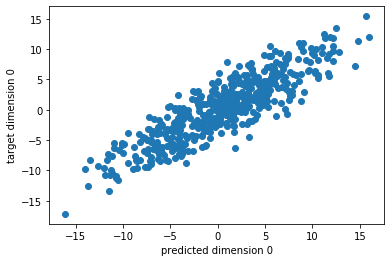

In [26]:
plt.scatter(np.dot(X,regression_coef)[:,0],Y[:,0])
plt.xlabel('predicted dimension 0')
plt.ylabel('target dimension 0')
plt.show()

## Sparsity in latent variable models

In [0]:
## Adding 3 random dimensions
## No association is expected from these features

X_sparse = np.hstack([X,np.random.randn(n*3).reshape([n,3])])
Y_sparse = np.hstack([Y,np.random.randn(n*3).reshape([n,3])])

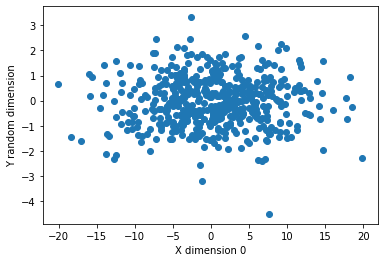

In [28]:
plt.scatter(X_sparse[:,0], Y_sparse[:,-1])
plt.xlabel('X dimension 0')
plt.ylabel('Y random dimension')
plt.show()

In [0]:
from sklearn import linear_model

n_components = 3

# Sparse PLS via regularization in NIPALS [Waaijenborg, et al 2007]

loading_x_sparse = np.ndarray([X_sparse.shape[1],n_components])
loading_y_sparse = np.ndarray([Y_sparse.shape[1],n_components])

scores_x_sparse = np.ndarray([X_sparse.shape[0],n_components])
scores_y_sparse = np.ndarray([Y_sparse.shape[0],n_components])

weight_x_sparse = np.ndarray([X_sparse.shape[1],n_components])
weight_y_sparse = np.ndarray([Y_sparse.shape[1],n_components])

current_X = X_sparse
current_Y = Y_sparse

## Penalty parameter for regularization
penalty = 10

eps = 1e-4

for i in range(n_components):
    t_x = current_X[:,0]
    for _ in range(100):
        w_y = current_Y.transpose().dot(t_x)/(t_x.transpose().dot(t_x))
        w_y = w_y/np.sqrt(np.sum(w_y**2))
        t_y = current_Y.dot(w_y)
        w_x = current_X.transpose().dot(t_y)/(t_y.transpose().dot(t_y))
        w_x = w_x/np.sqrt(np.sum(w_x**2))
        t_x = current_X.dot(w_x)
        
        ## Estimating sparse model for the weights of X
        lasso_x = linear_model.Lasso(alpha = penalty)
        lasso_x.fit(t_x.reshape(-1, 1), current_X)
        
        ## Estimating sparse model for the weights of Y
        lasso_y = linear_model.Lasso(alpha = penalty)
        lasso_y.fit(t_y.reshape(-1, 1), current_Y)
        
        w_x = (lasso_x.coef_ / (np.sqrt(np.sum(lasso_x.coef_**2) + eps))).reshape([X_sparse.shape[1]]) 
        w_y = (lasso_y.coef_ / (np.sqrt(np.sum(lasso_y.coef_**2) + eps))).reshape([Y_sparse.shape[1]])

    # Weights are such that X * weights = t
    weight_x_sparse[:,i] = w_x
    weight_y_sparse[:,i] = w_y
    
    # Latent dimensions
    scores_x_sparse[:,i] = t_x
    scores_x_sparse[:,i] = t_y
    
    # Loadings obtained by regressing X on t (X = t * loadings)
    
    loading_x_sparse[:,i] = np.dot(current_X.T, t_x)/t_x.transpose().dot(t_x) 
    loading_y_sparse[:,i] = np.dot(current_Y.T, t_y)/t_y.transpose().dot(t_y)
    
    # Deflation
    
    current_X = current_X - t_x.reshape(len(t_x),1).dot(w_x.reshape(1,len(w_x)))
    current_Y = current_Y - t_y.reshape(len(t_y),1).dot(w_y.reshape(1,len(w_y)))
    

In [30]:
weight_x_sparse

array([[ 0.70208516,  0.        ,  0.        ],
       [ 0.1365335 ,  0.54202326, -0.        ],
       [-0.69085044,  0.18380394,  0.        ],
       [ 0.        , -0.78373428,  0.        ],
       [-0.10492602,  0.24092155,  0.        ],
       [-0.        ,  0.        ,  0.        ],
       [-0.        , -0.        ,  0.        ],
       [ 0.        , -0.        , -0.        ]])

In [31]:
weight_y_sparse

array([[-0.14566382,  0.48775314,  0.        ],
       [ 0.78192078,  0.46962098, -0.        ],
       [ 0.30622615, -0.73579143,  0.        ],
       [-0.24846011,  0.        ,  0.        ],
       [ 0.46013309,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        , -0.        ]])

In [32]:
weight_x

array([[ 0.68437956,  0.05629853,  0.4234326 ],
       [ 0.25809992,  0.54652915,  0.35516935],
       [-0.6567837 ,  0.24211209,  0.65604151],
       [-0.04294846, -0.74351958,  0.36244143],
       [-0.17832458,  0.29444309, -0.36442464]])

In [33]:
weight_y

array([[-0.23807668,  0.50236279, -0.72126932],
       [ 0.70489432,  0.48995154,  0.21300797],
       [ 0.37754503, -0.70096698, -0.33655207],
       [-0.30089842,  0.05037142,  0.56407872],
       [ 0.46191274,  0.11699198, -0.05427769]])

In [34]:
plsca_sparse = PLSCanonical(n_components=3, scale = False)
plsca.fit(X_sparse, Y_sparse)
print(plsca.x_weights_)
print(plsca.y_weights_)

[[ 6.77234094e-01 -1.14502448e-01  4.08584091e-01]
 [ 2.10561191e-01 -5.66313791e-01  4.12596091e-01]
 [-6.74872543e-01 -1.85533993e-01  6.29837001e-01]
 [ 2.03288260e-02  7.44510423e-01  4.36432395e-01]
 [-2.02807444e-01 -2.78191620e-01 -2.59940450e-01]
 [-1.49035011e-03 -7.80655739e-03 -3.07249920e-02]
 [-1.35581041e-03  3.28565291e-04 -6.05388593e-02]
 [ 4.10350754e-03  2.76029788e-03 -5.89712420e-02]]
[[-0.27937062 -0.48011133 -0.5809981 ]
 [ 0.66171899 -0.54767872  0.17465182]
 [ 0.43474251  0.66695952 -0.26393399]
 [-0.30361336 -0.02631453  0.47129348]
 [ 0.45041098 -0.15468123 -0.03872249]
 [-0.00078314 -0.00883309  0.20619364]
 [-0.00511347  0.00089513  0.51493686]
 [ 0.00105507  0.002927    0.17602282]]


## Cross-validating components

In [0]:
n_cross_valid_run = 1000

n_components = 5

rep_results = [] 
for i in range(n_components):
  rep_results.append([])

for k in range(n_components):
  for i in range(n_cross_valid_run):
    batch1_idx = np.random.choice(range(X_sparse.shape[0]), size = int(X_sparse.shape[0]/2), replace = False)
    batch2_idx = np.where(np.in1d(range(X_sparse.shape[0]), batch1_idx, assume_unique=True, invert = True))[0]

    X_1 = X_sparse[batch1_idx, :]
    X_2 = X_sparse[batch2_idx, :]

    Y_1 = Y_sparse[batch1_idx, :]
    Y_2 = Y_sparse[batch2_idx, :]

    plsca1 = PLSCanonical(n_components = n_components, scale = False)
    plsca2 = PLSCanonical(n_components = n_components, scale = False)

    plsca1.fit(X_1,Y_1)
    plsca2.fit(X_2,Y_2)

    err1 = np.sum((plsca1.predict(X_2) - Y_2)**2)
    err2 = np.sum((plsca2.predict(X_1) - Y_1)**2)

    rep_results[k].append(np.mean([err1,err2]))


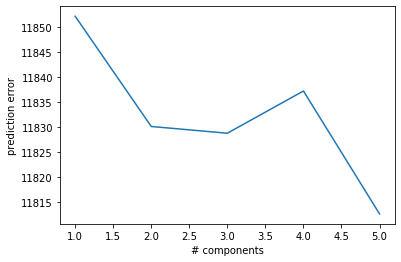

In [36]:
plt.plot(range(1,n_components+1),np.mean(rep_results, 1))
plt.xlabel('# components')
plt.ylabel('prediction error')
plt.show()

# Multi-channel Variational Autoencoder

https://gitlab.inria.fr/epione_ML/mcvae

In [37]:
from mcvae import pytorch_modules, utilities, preprocessing, plot, diagnostics
from pathlib import Path
import torch

DEVICE = pytorch_modules.DEVICE
print(f"Running on {DEVICE}")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Running on cpu


In [0]:
init_dict = {
    'n_channels': 2, # X and Y
    'lat_dim': n_components,
    'n_feats': tuple([X.shape[1], Y.shape[1]]),
}

data = []
data.append(torch.FloatTensor(X))
data.append(torch.FloatTensor(Y))

In [0]:
adam_lr = 1e-2
n_epochs = 4000

# Multi-Channel VAE
torch.manual_seed(24)
model = pytorch_modules.MultiChannelBase(**init_dict)

In [40]:
###################
## Model Fitting ##
###################

model.init_loss()
model.optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)
model.optimize(epochs = n_epochs, data = data)

====> Epoch:    0/4000 (0%)	Loss: 71488.2188	LL: -4049.6021	KL: 67438.6172	LL/KL: -0.0600
====> Epoch:  100/4000 (2%)	Loss: 194.3168	LL: -67.1547	KL: 127.1621	LL/KL: -0.5281
====> Epoch:  200/4000 (5%)	Loss: 143.5219	LL: -63.7310	KL: 79.7909	LL/KL: -0.7987
====> Epoch:  300/4000 (8%)	Loss: 116.8674	LL: -61.4052	KL: 55.4622	LL/KL: -1.1072
====> Epoch:  400/4000 (10%)	Loss: 100.7219	LL: -59.1223	KL: 41.5996	LL/KL: -1.4212
====> Epoch:  500/4000 (12%)	Loss: 91.1191	LL: -58.1860	KL: 32.9331	LL/KL: -1.7668
====> Epoch:  600/4000 (15%)	Loss: 84.7074	LL: -57.6440	KL: 27.0634	LL/KL: -2.1300
====> Epoch:  700/4000 (18%)	Loss: 79.9366	LL: -57.2014	KL: 22.7352	LL/KL: -2.5160
====> Epoch:  800/4000 (20%)	Loss: 77.0119	LL: -57.4230	KL: 19.5889	LL/KL: -2.9314
====> Epoch:  900/4000 (22%)	Loss: 74.6018	LL: -57.2229	KL: 17.3788	LL/KL: -3.2927
====> Epoch: 1000/4000 (25%)	Loss: 72.0358	LL: -56.4733	KL: 15.5624	LL/KL: -3.6288
====> Epoch: 1100/4000 (28%)	Loss: 70.4793	LL: -56.3243	KL: 14.1550	LL/KL: -3.

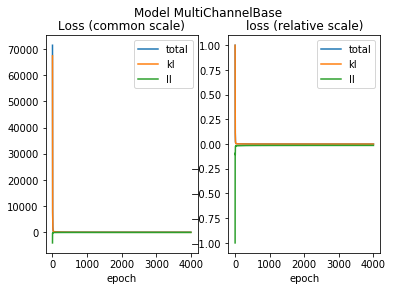

In [41]:
## Plotting model convergence

diagnostics.plot_loss(model)

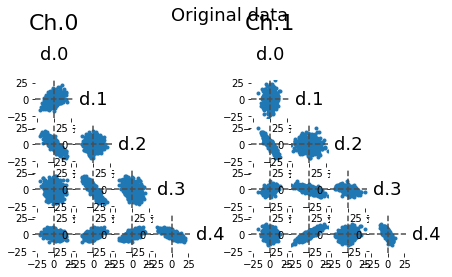

In [42]:
plot.lsplom(data, title = 'Original data')

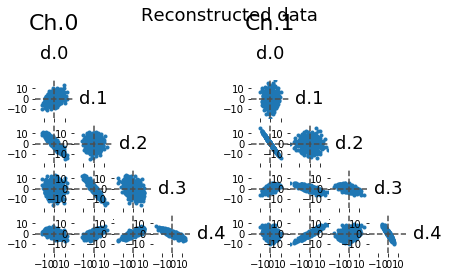

In [43]:
x_hat = model.reconstruct(data)
plot.lsplom(utilities.ltonumpy(x_hat), title = 'Reconstructed data')

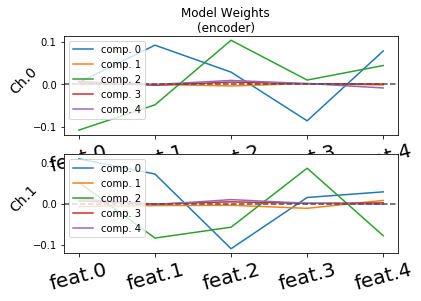

In [72]:
## Plotting the weights of the encoder

diagnostics.plot_weights(model, side = 'encoder')

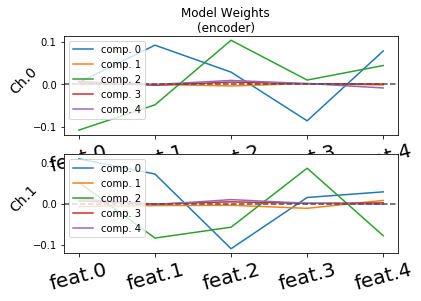

In [73]:
## Plotting the weights of the decoder

diagnostics.plot_weights(model, side = 'encoder')

In [0]:
weights_decoding_X = model.W_out[0]
weights_decoding_Y = model.W_out[1]

In [47]:
weights_decoding_X.weight

Parameter containing:
tensor([[ 2.1610e-01, -6.0375e-02, -2.8656e+00,  1.2361e-01,  2.2701e-02],
        [ 2.5480e+00, -1.2352e-02, -1.0290e+00, -3.7819e-02,  7.5528e-03],
        [ 1.1820e+00,  6.0326e-04,  2.7715e+00,  9.7009e-02,  2.1381e-01],
        [-3.4785e+00,  2.9244e-02,  1.1863e-01,  5.7682e-02,  4.4520e-02],
        [ 1.4095e+00, -2.6511e-02,  7.9243e-01,  3.1211e-05, -5.7282e-02]],
       requires_grad=True)

In [48]:
weights_decoding_Y.weight

Parameter containing:
tensor([[ 1.9846, -0.1438,  1.0001,  0.0911,  0.1136],
        [ 2.1172,  0.0137, -3.2433,  0.0046, -0.0549],
        [-2.7482,  0.0829, -1.5856,  0.0674,  0.2531],
        [ 0.1393, -0.1042,  1.3723,  0.0037,  0.0127],
        [ 0.5699,  0.1447, -2.1129,  0.0208, -0.0172]], requires_grad=True)

In [0]:
weights_encoding_X = model.W_mu[0]
weights_encoding_Y = model.W_mu[1]

In [50]:
weights_encoding_X.weight

Parameter containing:
tensor([[ 4.7537e-03,  9.2790e-02,  2.9057e-02, -8.6013e-02,  7.9090e-02],
        [ 1.9456e-04, -4.6613e-05, -3.6500e-03,  2.0945e-03, -1.3206e-03],
        [-1.0797e-01, -4.8242e-02,  1.0436e-01,  1.0329e-02,  4.4689e-02],
        [ 6.9096e-03, -2.0206e-03,  5.6378e-03,  1.4770e-03,  8.6338e-04],
        [ 3.4806e-03, -1.0366e-04,  9.4615e-03,  2.1361e-03, -8.3497e-03]],
       requires_grad=True)

In [51]:
weights_encoding_Y.weight

Parameter containing:
tensor([[ 0.1088,  0.0720, -0.1092,  0.0151,  0.0287],
        [-0.0069, -0.0045, -0.0038, -0.0112,  0.0080],
        [ 0.0519, -0.0834, -0.0570,  0.0862, -0.0777],
        [ 0.0071, -0.0006,  0.0046,  0.0009,  0.0021],
        [ 0.0120, -0.0023,  0.0099,  0.0012, -0.0012]], requires_grad=True)

In [0]:
encoding = model.encode(data)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()

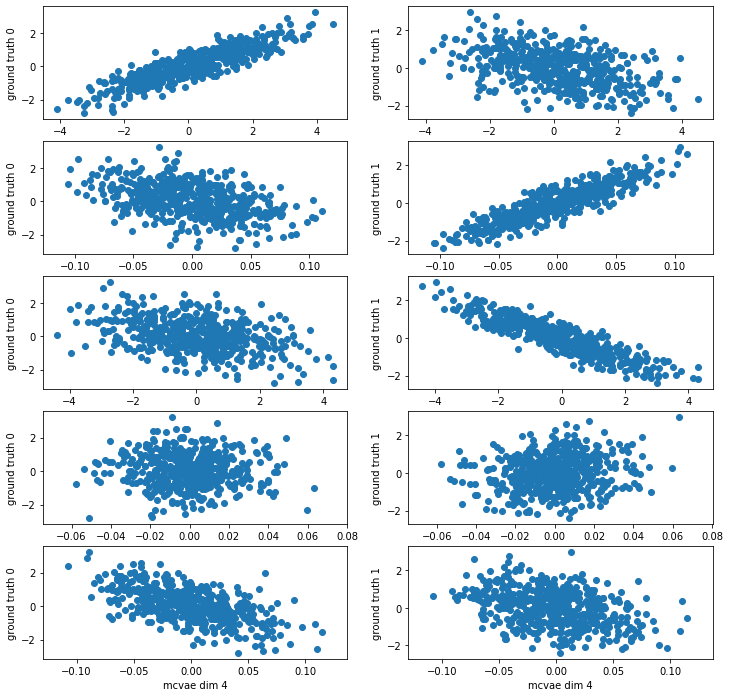

In [53]:
plt.figure(figsize=(12, 12))
for idx,k in enumerate(range(n_components)):
  plt.subplot(n_components,2,2*idx+1)
  plt.scatter(encoding_x[:,k], latents[:,0])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 0')
  plt.subplot(n_components,2,2*idx+2)
  plt.scatter(encoding_x[:,k], latents[:,1])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 1')
plt.show()

In [55]:
adam_lr = 1e-2
n_epochs = 4000

model_sparse1 = pytorch_modules.MultiChannelSparseVAE(**init_dict)

model_sparse1.init_loss()
model_sparse1.optimizer = torch.optim.Adam(model_sparse1.parameters(), lr=adam_lr)
model_sparse1.optimize(epochs = n_epochs, data = data)


====> Epoch:    0/4000 (0%)	Loss: 79.9102	LL: -75.6165	KL: 4.2937	LL/KL: -17.6112
====> Epoch:  100/4000 (2%)	Loss: 59.0747	LL: -54.7105	KL: 4.3643	LL/KL: -12.5359
====> Epoch:  200/4000 (5%)	Loss: 56.4786	LL: -50.6643	KL: 5.8143	LL/KL: -8.7138
====> Epoch:  300/4000 (8%)	Loss: 55.4741	LL: -47.9951	KL: 7.4791	LL/KL: -6.4172
====> Epoch:  400/4000 (10%)	Loss: 54.5441	LL: -45.7810	KL: 8.7632	LL/KL: -5.2243
====> Epoch:  500/4000 (12%)	Loss: 54.4308	LL: -45.0761	KL: 9.3547	LL/KL: -4.8186
====> Epoch:  600/4000 (15%)	Loss: 53.9469	LL: -44.4917	KL: 9.4552	LL/KL: -4.7055
====> Epoch:  700/4000 (18%)	Loss: 54.2117	LL: -44.7387	KL: 9.4731	LL/KL: -4.7227
====> Epoch:  800/4000 (20%)	Loss: 54.1340	LL: -44.6415	KL: 9.4925	LL/KL: -4.7028
====> Epoch:  900/4000 (22%)	Loss: 54.2434	LL: -44.7918	KL: 9.4516	LL/KL: -4.7391
====> Epoch: 1000/4000 (25%)	Loss: 54.3634	LL: -44.9368	KL: 9.4266	LL/KL: -4.7670
====> Epoch: 1100/4000 (28%)	Loss: 54.1016	LL: -44.7152	KL: 9.3864	LL/KL: -4.7638
====> Epoch: 1200/

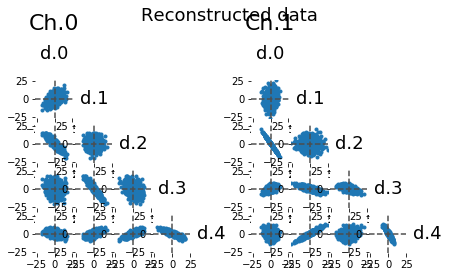

In [56]:
x_hat = model_sparse1.reconstruct(data)
plot.lsplom(utilities.ltonumpy(x_hat), title = 'Reconstructed data')

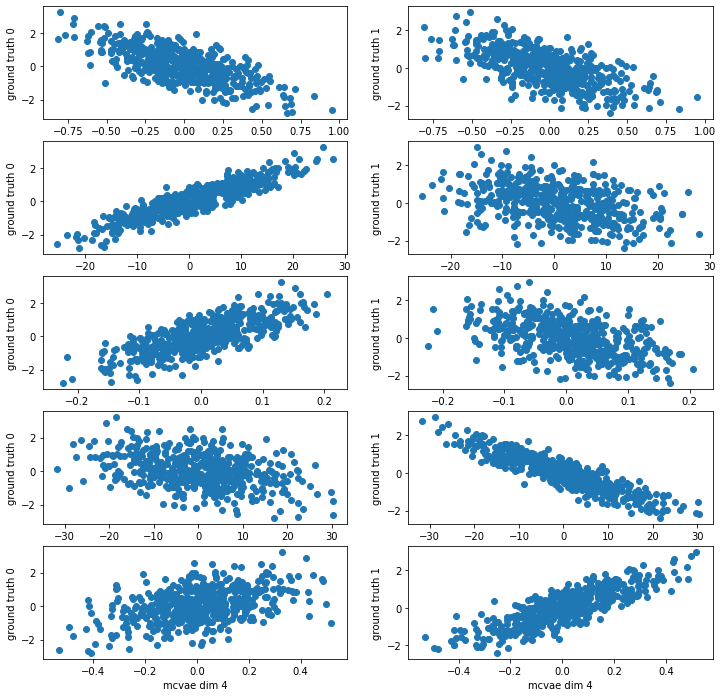

In [57]:
encoding = model_sparse1.encode(data)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()


plt.figure(figsize=(12, 12))
for idx,k in enumerate(range(n_components)):
  plt.subplot(n_components,2,2*idx+1)
  plt.scatter(encoding_x[:,k], latents[:,0])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 0')
  plt.subplot(n_components,2,2*idx+2)
  plt.scatter(encoding_x[:,k], latents[:,1])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 1')
plt.show()


In [58]:
print('Probability of redundancy: ', model_sparse1.dropout.detach().numpy())

Probability of redundancy:  [[0.99698573 0.03335677 0.996888   0.03047439 0.99727046]]


In [0]:
model_sparse1.dropout_threshold = 0.2

Dropout threshold: 0.2
Components kept: [1, 3]


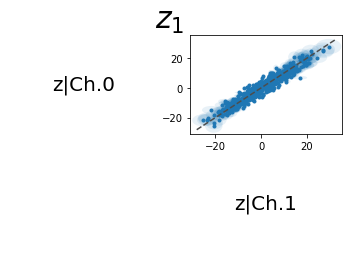

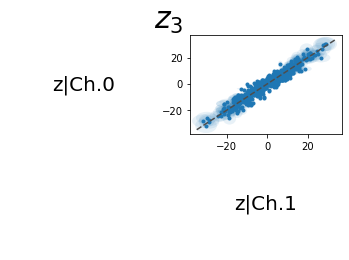

In [60]:
diagnostics.plot_latent_space(model_sparse1, data)

In [61]:
init_dict = {
    'n_channels': 2, # X and Y
    'lat_dim': n_components + 3,
    'n_feats': tuple([X_sparse.shape[1], Y_sparse.shape[1]]),
}


data_sparse = []
data_sparse.append(torch.FloatTensor(X_sparse))
data_sparse.append(torch.FloatTensor(Y_sparse))

adam_lr = 1e-2
n_epochs = 4000

model_sparse = pytorch_modules.MultiChannelSparseVAE(**init_dict)

model_sparse.init_loss()
model_sparse.optimizer = torch.optim.Adam(model_sparse.parameters(), lr=adam_lr)
model_sparse.optimize(epochs = n_epochs, data = data_sparse)

====> Epoch:    0/4000 (0%)	Loss: 107.8286	LL: -100.9031	KL: 6.9255	LL/KL: -14.5699
====> Epoch:  100/4000 (2%)	Loss: 82.8465	LL: -78.0798	KL: 4.7667	LL/KL: -16.3803
====> Epoch:  200/4000 (5%)	Loss: 78.6620	LL: -73.2919	KL: 5.3701	LL/KL: -13.6481
====> Epoch:  300/4000 (8%)	Loss: 76.7239	LL: -70.8565	KL: 5.8675	LL/KL: -12.0761
====> Epoch:  400/4000 (10%)	Loss: 74.1832	LL: -66.9798	KL: 7.2034	LL/KL: -9.2983
====> Epoch:  500/4000 (12%)	Loss: 71.8565	LL: -62.5742	KL: 9.2823	LL/KL: -6.7413
====> Epoch:  600/4000 (15%)	Loss: 71.3530	LL: -61.5992	KL: 9.7539	LL/KL: -6.3154
====> Epoch:  700/4000 (18%)	Loss: 71.4336	LL: -61.7065	KL: 9.7271	LL/KL: -6.3438
====> Epoch:  800/4000 (20%)	Loss: 71.5683	LL: -61.9480	KL: 9.6203	LL/KL: -6.4393
====> Epoch:  900/4000 (22%)	Loss: 70.9601	LL: -61.3408	KL: 9.6193	LL/KL: -6.3769
====> Epoch: 1000/4000 (25%)	Loss: 71.4699	LL: -61.9433	KL: 9.5266	LL/KL: -6.5021
====> Epoch: 1100/4000 (28%)	Loss: 71.1660	LL: -61.6657	KL: 9.5002	LL/KL: -6.4910
====> Epoch: 1

In [62]:
print('Probability of redundancy: ', model_sparse.dropout.detach().numpy())
indices = np.where(model_sparse.dropout.detach().numpy().flatten() < 0.9)[0]
print('Non-redundant components: ', indices)

Probability of redundancy:  [[0.0295256  0.9953503  0.99557316 0.9956074  0.9959437  0.03447155
  0.9950131  0.9953517 ]]
Non-redundant components:  [0 5]


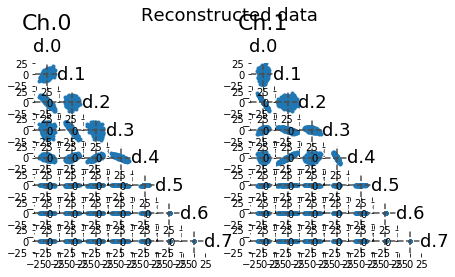

In [63]:
model_sparse.dropout_threshold = 0.2

x_hat = model_sparse.reconstruct(data_sparse)
plot.lsplom(utilities.ltonumpy(x_hat), title = 'Reconstructed data')

Dropout threshold: 0.2
Components kept: [0, 5]


<Figure size 864x576 with 0 Axes>

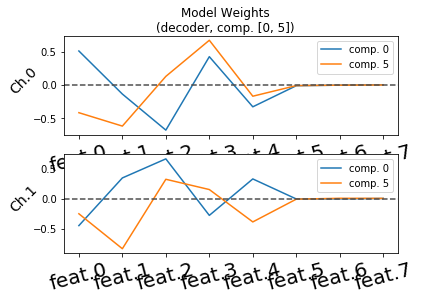

In [64]:
## Plotting the weights of the decoder

plt.figure(figsize=(12, 8))
diagnostics.plot_weights(model_sparse, side = 'decoder')

Dropout threshold: 0.2
Components kept: [0, 5]


<Figure size 864x576 with 0 Axes>

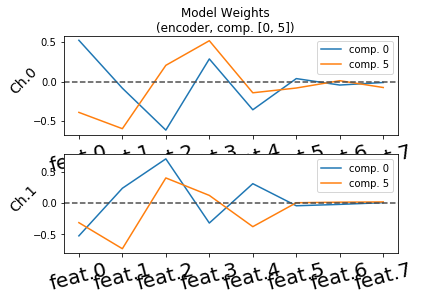

In [65]:
plt.figure(figsize=(12, 8))
diagnostics.plot_weights(model_sparse, side = 'encoder')

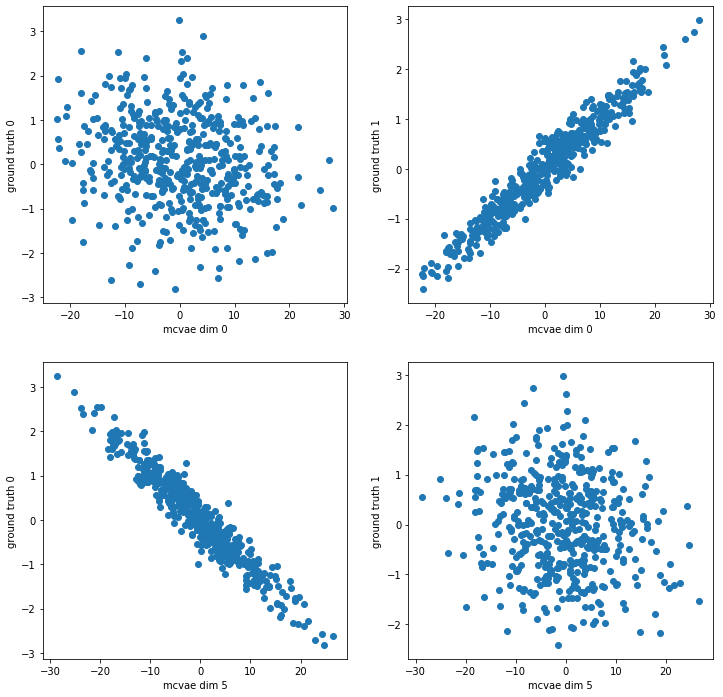

In [66]:
encoding = model_sparse.encode(data_sparse)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()

plt.figure(figsize=(12, 12))
for idx,k in enumerate(indices):
  plt.subplot(len(indices),2,2*idx+1)
  plt.scatter(encoding_x[:,k], latents[:,0])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 0')
  plt.subplot(len(indices),2,2*idx+2)
  plt.scatter(encoding_x[:,k], latents[:,1])
  plt.xlabel(str('mcvae dim ') + str(k))
  plt.ylabel('ground truth 1')

plt.show()

Dropout threshold: 0.2
Components kept: [1, 3]


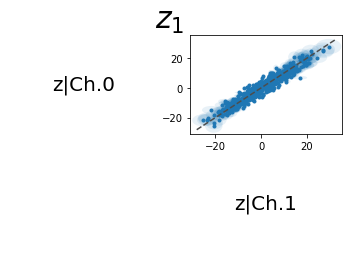

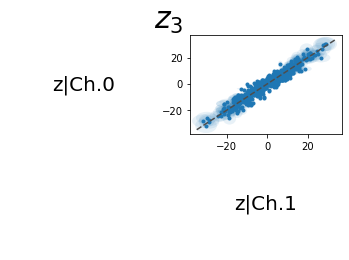

In [75]:
diagnostics.plot_latent_space(model_sparse1, data)

# Increasing the number of channels

In [0]:
# generating a new channel

size_z = 3
size_z_redundant = 4

transform_z = np.random.randint(-8,8, size = 2*size_z).reshape([2,size_z])

Z = latents.dot(transform_z) + 2*np.random.normal(size = n*size_z).reshape((n, size_z))
Z = np.hstack([Z,np.random.randn(n*size_z_redundant).reshape([n,size_z_redundant])])

In [68]:
init_dict = {
    'n_channels': 3, # X and Y
    'lat_dim': n_components + 3,
    'n_feats': tuple([X_sparse.shape[1], Y_sparse.shape[1], Z.shape[1]]),
}


data_multi = []
data_multi.append(torch.FloatTensor(X_sparse))
data_multi.append(torch.FloatTensor(Y_sparse))
data_multi.append(torch.FloatTensor(Z))

adam_lr = 1e-2
n_epochs = 4000

model_multi = pytorch_modules.MultiChannelSparseVAE(**init_dict)

model_multi.init_loss()
model_multi.optimizer = torch.optim.Adam(model_multi.parameters(), lr=adam_lr)
model_multi.optimize(epochs = n_epochs, data = data_multi)

====> Epoch:    0/4000 (0%)	Loss: 220.2668	LL: -209.9432	KL: 10.3236	LL/KL: -20.3363
====> Epoch:  100/4000 (2%)	Loss: 171.1065	LL: -163.5413	KL: 7.5652	LL/KL: -21.6175
====> Epoch:  200/4000 (5%)	Loss: 159.2679	LL: -150.0443	KL: 9.2236	LL/KL: -16.2674
====> Epoch:  300/4000 (8%)	Loss: 153.4883	LL: -142.6405	KL: 10.8477	LL/KL: -13.1493
====> Epoch:  400/4000 (10%)	Loss: 147.9475	LL: -134.3651	KL: 13.5825	LL/KL: -9.8925
====> Epoch:  500/4000 (12%)	Loss: 146.3797	LL: -131.7754	KL: 14.6043	LL/KL: -9.0230
====> Epoch:  600/4000 (15%)	Loss: 146.0936	LL: -131.5168	KL: 14.5767	LL/KL: -9.0224
====> Epoch:  700/4000 (18%)	Loss: 146.1049	LL: -131.6580	KL: 14.4469	LL/KL: -9.1132
====> Epoch:  800/4000 (20%)	Loss: 145.9427	LL: -131.6508	KL: 14.2919	LL/KL: -9.2115
====> Epoch:  900/4000 (22%)	Loss: 145.9551	LL: -131.7277	KL: 14.2274	LL/KL: -9.2587
====> Epoch: 1000/4000 (25%)	Loss: 145.8409	LL: -131.6424	KL: 14.1985	LL/KL: -9.2716
====> Epoch: 1100/4000 (28%)	Loss: 145.7875	LL: -131.6271	KL: 14.16

Probability of redundancy:  [[0.03838383 0.9959936  0.99585444 0.9957276  0.9959605  0.99581784
  0.9958369  0.02788585]]
Non-redundant components:  [0 7]


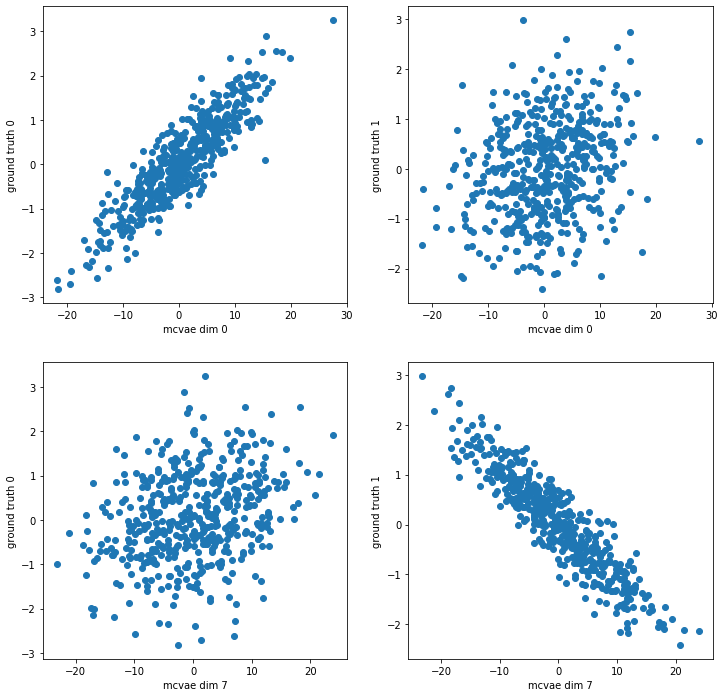

In [69]:
print('Probability of redundancy: ', model_multi.dropout.detach().numpy())
indices = np.where(model_multi.dropout.detach().numpy().flatten() < 0.9)[0]
print('Non-redundant components: ', indices)

model_multi.dropout_threshold = 0.2

encoding = model_multi.encode(data_multi)

encoding_x = encoding[0].loc.detach().numpy()
encoding_y = encoding[1].loc.detach().numpy()
encoding_z = encoding[2].loc.detach().numpy()

plt.figure(figsize=(12, 12))
for idx,k in enumerate(indices):
    plt.subplot(len(indices),2,2*idx+1)
    plt.scatter(encoding_z[:,k], latents[:,0])
    plt.xlabel(str('mcvae dim ') + str(k))
    plt.ylabel('ground truth 0')
    plt.subplot(len(indices),2,2*idx+2)
    plt.scatter(encoding_z[:,k], latents[:,1])
    plt.xlabel(str('mcvae dim ') + str(k))
    plt.ylabel('ground truth 1')

plt.show()

In [0]:
reconstruction = model_multi.decode(model_multi.sample_from(encoding))

decoding_x_from_x = reconstruction[0][0].loc.detach().numpy()
decoding_x_from_y = reconstruction[1][0].loc.detach().numpy()
decoding_x_from_z = reconstruction[2][0].loc.detach().numpy()

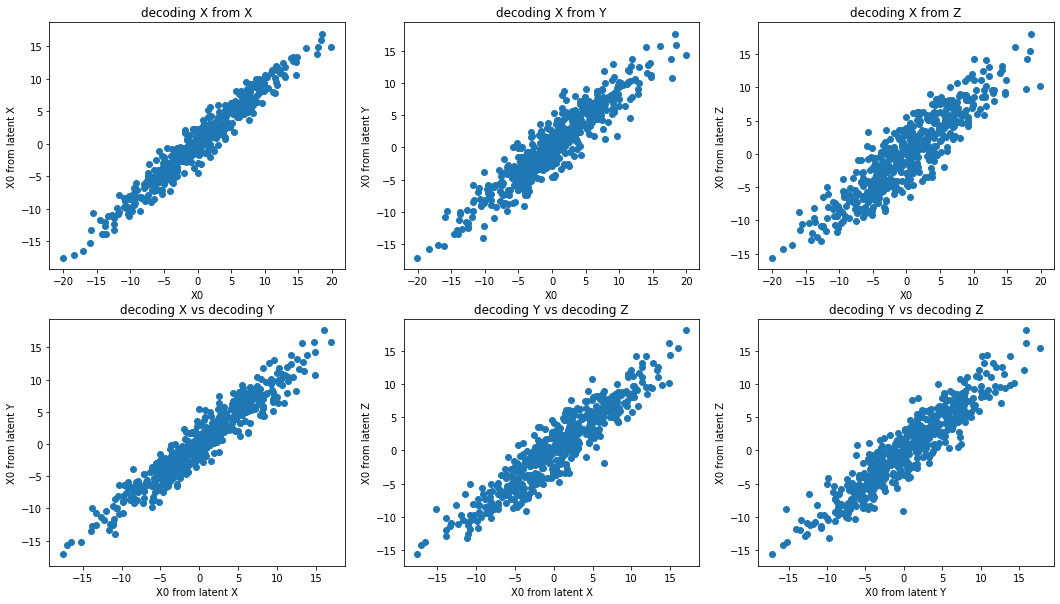

In [123]:
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
plt.scatter(X_sparse[:,0], decoding_x_from_x[:,0])
plt.title('decoding X from X')
plt.xlabel('X0')
plt.ylabel('X0 from latent X')
plt.subplot(2,3,2)
plt.scatter(X_sparse[:,0], decoding_x_from_y[:,0])
plt.title('decoding X from Y')
plt.ylabel('X0 from latent Y')
plt.xlabel('X0')
plt.subplot(2,3,3)
plt.scatter(X_sparse[:,0], decoding_x_from_z[:,0])
plt.title('decoding X from Z')
plt.xlabel('X0')
plt.ylabel('X0 from latent Z')
plt.subplot(2,3,4)
plt.scatter(decoding_x_from_x[:,0], decoding_x_from_y[:,0])
plt.title('decoding X vs decoding Y')
plt.xlabel('X0 from latent X')
plt.ylabel('X0 from latent Y')
plt.subplot(2,3,5)
plt.scatter(decoding_x_from_x[:,0], decoding_x_from_z[:,0])
plt.title('decoding Y vs decoding Z')
plt.xlabel('X0 from latent X')
plt.ylabel('X0 from latent Z')
plt.subplot(2,3,6)
plt.scatter(decoding_x_from_y[:,0], decoding_x_from_z[:,0])
plt.title('decoding Y vs decoding Z')
plt.xlabel('X0 from latent Y')
plt.ylabel('X0 from latent Z')
plt.show()

Dropout threshold: 0.2
Components kept: [0, 7]


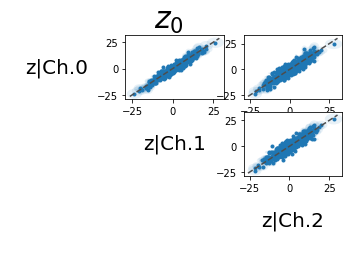

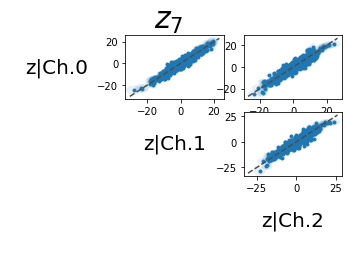

In [124]:
diagnostics.plot_latent_space(model_multi, data_multi)